# Change Point Detection

In [1]:
import os

import numpy as np
import pandas as pd
from sqlalchemy import create_engine, URL

import matplotlib.pyplot as plt

import ruptures as rpt

In [2]:
db_url = URL.create(
    drivername="postgresql",
    username=os.environ["DB_USER"],
    password=os.environ["DB_PASSWORD"],
    host=os.environ["DB_HOST"],
    port=os.environ["DB_PORT"],
    database=os.environ["DB_NAME"],
)

db = create_engine(db_url)

In [3]:
# Retrieving Data
weekly_df = pd.read_sql("SELECT * FROM glb_wk_time_series", db)

weekly_df = weekly_df.sort_values("week").reset_index(drop=True)

weekly_df["week"] = pd.to_datetime(weekly_df.week, format="%Y-%m-%d")

weekly_df = weekly_df[:-1]

weekly_df.set_index("week", inplace=True)
weekly_df = weekly_df.sort_index()

# Show Data
weekly_df

,incident_count
week,
2017-01-02,31
2017-01-09,62
2017-01-16,30
2017-01-23,38
2017-01-30,29
...,...
2023-08-07,30
2023-08-14,39
2023-08-21,37


## Pelt

(<Figure size 1000x200 with 1 Axes>, [<Axes: >])

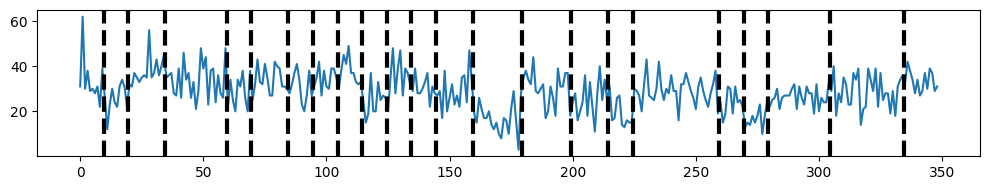

In [11]:
# Create Model
p_10 = rpt.Pelt(model="l2", min_size=10)

# Fit Model
p_10.fit(weekly_df)

# Predict
p_10_result = p_10.predict(pen=1)

# Plot
rpt.display(weekly_df, [], p_10_result)

(<Figure size 1000x200 with 1 Axes>, [<Axes: >])

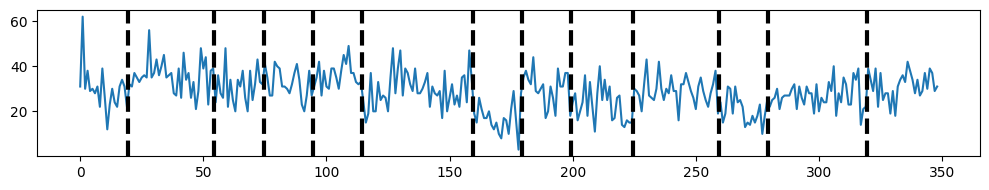

In [12]:
# Create Model
p_20 = rpt.Pelt(model="l2", min_size=20)

# Fit Model
p_20.fit(weekly_df)

# Predict
p_20_result = p_20.predict(pen=1)

# Plot
rpt.display(weekly_df, [], p_20_result)

(<Figure size 1000x200 with 1 Axes>, [<Axes: >])

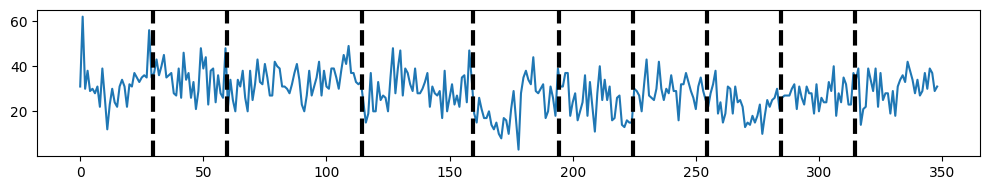

In [13]:
# Create Model
p_30 = rpt.Pelt(model="l2", min_size=30)

# Fit Model
p_30.fit(weekly_df)

# Predict
p_30_result = p_30.predict(pen=1)

# Plot
rpt.display(weekly_df, [], p_30_result)

## Binary Segmentation

(<Figure size 1000x200 with 1 Axes>, [<Axes: >])

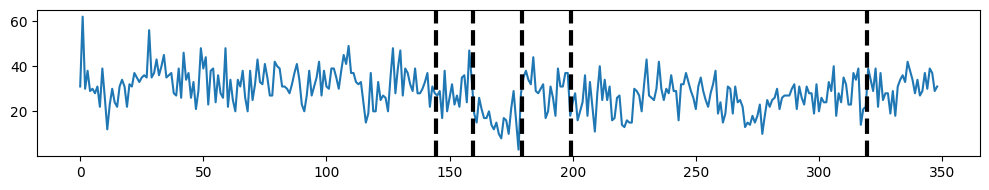

In [14]:
# Create Model
s_10 = rpt.Binseg(model="l2", min_size=10)

# Fit Model
s_10.fit(weekly_df)

# Predict
s_10_result = s_10.predict(n_bkps=5)

# Plot
rpt.display(weekly_df, [], s_10_result)

(<Figure size 1000x200 with 1 Axes>, [<Axes: >])

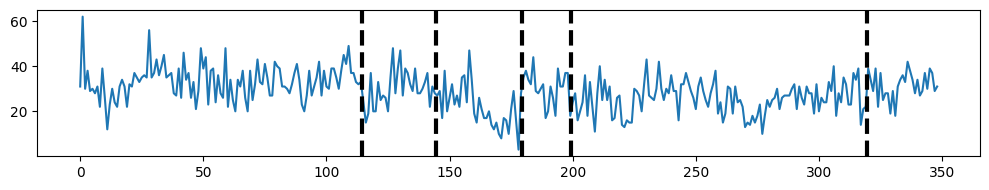

In [15]:
# Create Model
s_20 = rpt.Binseg(model="l2", min_size=20)

# Fit Model
s_20.fit(weekly_df)

# Predict
s_20_result = s_20.predict(n_bkps=5)

# Plot
rpt.display(weekly_df, [], s_20_result)

(<Figure size 1000x200 with 1 Axes>, [<Axes: >])

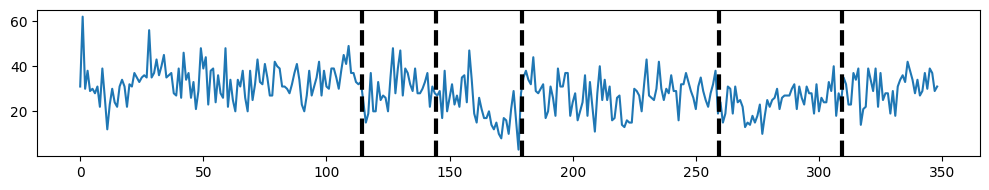

In [16]:
# Create Model
s_30 = rpt.Binseg(model="l2", min_size=30)

# Fit Model
s_30.fit(weekly_df)

# Predict
s_30_result = s_30.predict(n_bkps=5)

# Plot
rpt.display(weekly_df, [], s_30_result)

## Window

(<Figure size 1000x200 with 1 Axes>, [<Axes: >])

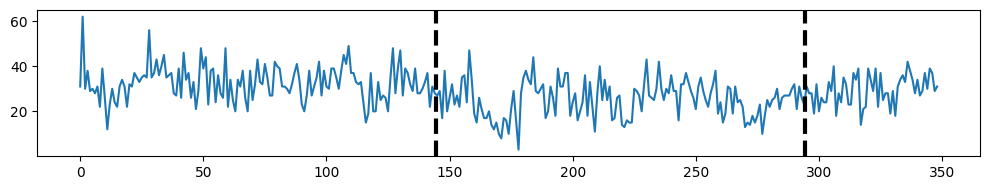

In [17]:
# Create Model
w_10 = rpt.Window(model="l2", min_size=10)

# Fit Model
w_10.fit(weekly_df)

# Predict
w_10_result = w_10.predict(n_bkps=5)

# Plot
rpt.display(weekly_df, [], w_10_result)

(<Figure size 1000x200 with 1 Axes>, [<Axes: >])

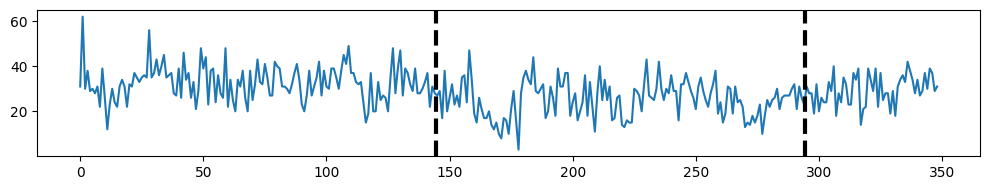

In [18]:
# Create Model
w_20 = rpt.Window(model="l2", min_size=20)

# Fit Model
w_20.fit(weekly_df)

# Predict
w_20_result = w_20.predict(n_bkps=5)

# Plot
rpt.display(weekly_df, [], w_20_result)

(<Figure size 1000x200 with 1 Axes>, [<Axes: >])

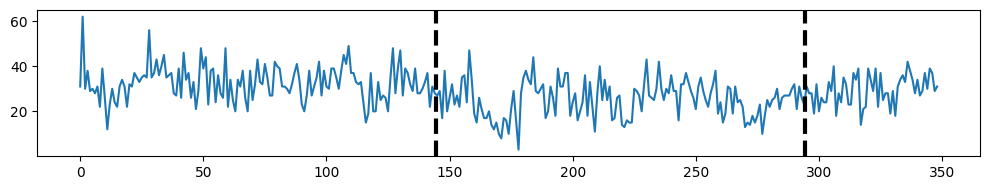

In [19]:
# Create Model
w_30 = rpt.Window(model="l2", min_size=30)

# Fit Model
w_30.fit(weekly_df)

# Predict
w_30_result = w_30.predict(n_bkps=5)

# Plot
rpt.display(weekly_df, [], w_30_result)

## Bottom Up

(<Figure size 1000x200 with 1 Axes>, [<Axes: >])

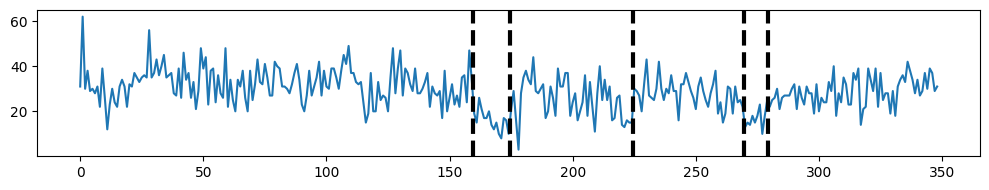

In [20]:
# Create Model
b_10 = rpt.BottomUp(model="l2", min_size=10)

# Fit Model
b_10.fit(weekly_df)

# Predict
b_10_result = b_10.predict(n_bkps=5)

# Plot
rpt.display(weekly_df, [], b_10_result)

(<Figure size 1000x200 with 1 Axes>, [<Axes: >])

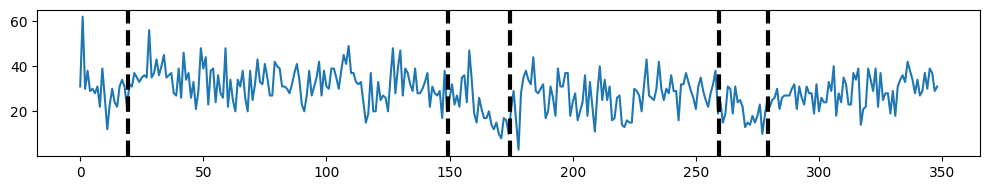

In [21]:
# Create Model
b_20 = rpt.BottomUp(model="l2", min_size=20)

# Fit Model
b_20.fit(weekly_df)

# Predict
b_20_result = b_20.predict(n_bkps=5)

# Plot
rpt.display(weekly_df, [], b_20_result)

(<Figure size 1000x200 with 1 Axes>, [<Axes: >])

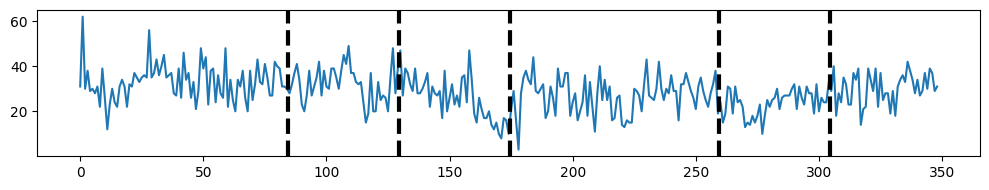

In [22]:
# Create Model
b_30 = rpt.BottomUp(model="l2", min_size=30)

# Fit Model
b_30.fit(weekly_df)

# Predict
b_30_result = b_30.predict(n_bkps=5)

# Plot
rpt.display(weekly_df, [], b_30_result)

# Result Aggregation

In [94]:
# Lists of Results
pelt_results = p_10_result + p_20_result + p_30_result
binseg_results = s_10_result + s_20_result + s_30_result
window_results = w_10_result + w_20_result + w_30_result
bottomup_results = b_10_result + b_20_result + b_30_result

all_results = pelt_results + binseg_results + window_results + bottomup_results

In [35]:
# Date Labels
index_date_conversion = {}

indexes = list(weekly_df.index)

for i in range(len(indexes)):
    index_date_conversion[i] = str(indexes[i]).split(" ")[0]

In [43]:
# Convert Results List Values to Date Strings
pelt_results_dts = [index_date_conversion[i-1] for i in pelt_results if index_date_conversion[i-1] != '2023-09-04']
binseg_results_dts = [index_date_conversion[i-1] for i in binseg_results if index_date_conversion[i-1] != '2023-09-04']
window_results_dts = [index_date_conversion[i-1] for i in window_results if index_date_conversion[i-1] != '2023-09-04']
bottomup_results_dts = [index_date_conversion[i-1] for i in bottomup_results if index_date_conversion[i-1] != '2023-09-04']

# Converting to DFs
pelt_ct_df = pd.DataFrame(pelt_results_dts).value_counts()
binseg_ct_df = pd.DataFrame(binseg_results_dts).value_counts()
window_ct_df = pd.DataFrame(window_results_dts).value_counts()
bottomup_ct_df = pd.DataFrame(bottomup_results_dts).value_counts()

# All DF
all_ct_df = pd.DataFrame((pelt_results_dts + binseg_results_dts + window_results_dts + bottomup_results_dts)).value_counts()

In [44]:
# Viewing Common Change Points - Pelt
pelt_ct_df.loc[pelt_ct_df.values > 1]

2020-01-20    3
2021-04-19    3
2019-03-11    3
2020-10-26    2
2017-05-15    2
2021-12-20    2
2018-10-22    2
2020-06-08    2
2022-05-09    2
2018-02-19    2
Name: count, dtype: int64

In [45]:
# Viewing Common Change Points - Binseg
binseg_ct_df.loc[binseg_ct_df.values > 1]

2019-10-07    3
2020-06-08    3
2019-03-11    2
2020-10-26    2
2023-02-13    2
Name: count, dtype: int64

In [46]:
# Viewing Common Change Points - Window
window_ct_df.loc[window_ct_df.values > 1]

2019-10-07    3
2022-08-22    3
Name: count, dtype: int64

In [47]:
# Viewing Common Change Points - Bottom Up
bottomup_ct_df.loc[bottomup_ct_df.values > 1]

2020-05-04    3
2021-12-20    2
2022-05-09    2
Name: count, dtype: int64

In [48]:
# Viewing Common Change Points - All
all_ct_df.loc[all_ct_df.values > 1]

2019-10-07    7
2020-01-20    5
2021-12-20    5
2020-06-08    5
2019-03-11    5
2020-10-26    4
2021-04-19    4
2022-05-09    4
2022-08-22    3
2023-02-13    3
2020-05-04    3
2017-05-15    3
2022-10-31    2
2018-02-19    2
2018-10-22    2
2018-08-13    2
2022-02-28    2
Name: count, dtype: int64

# Plots

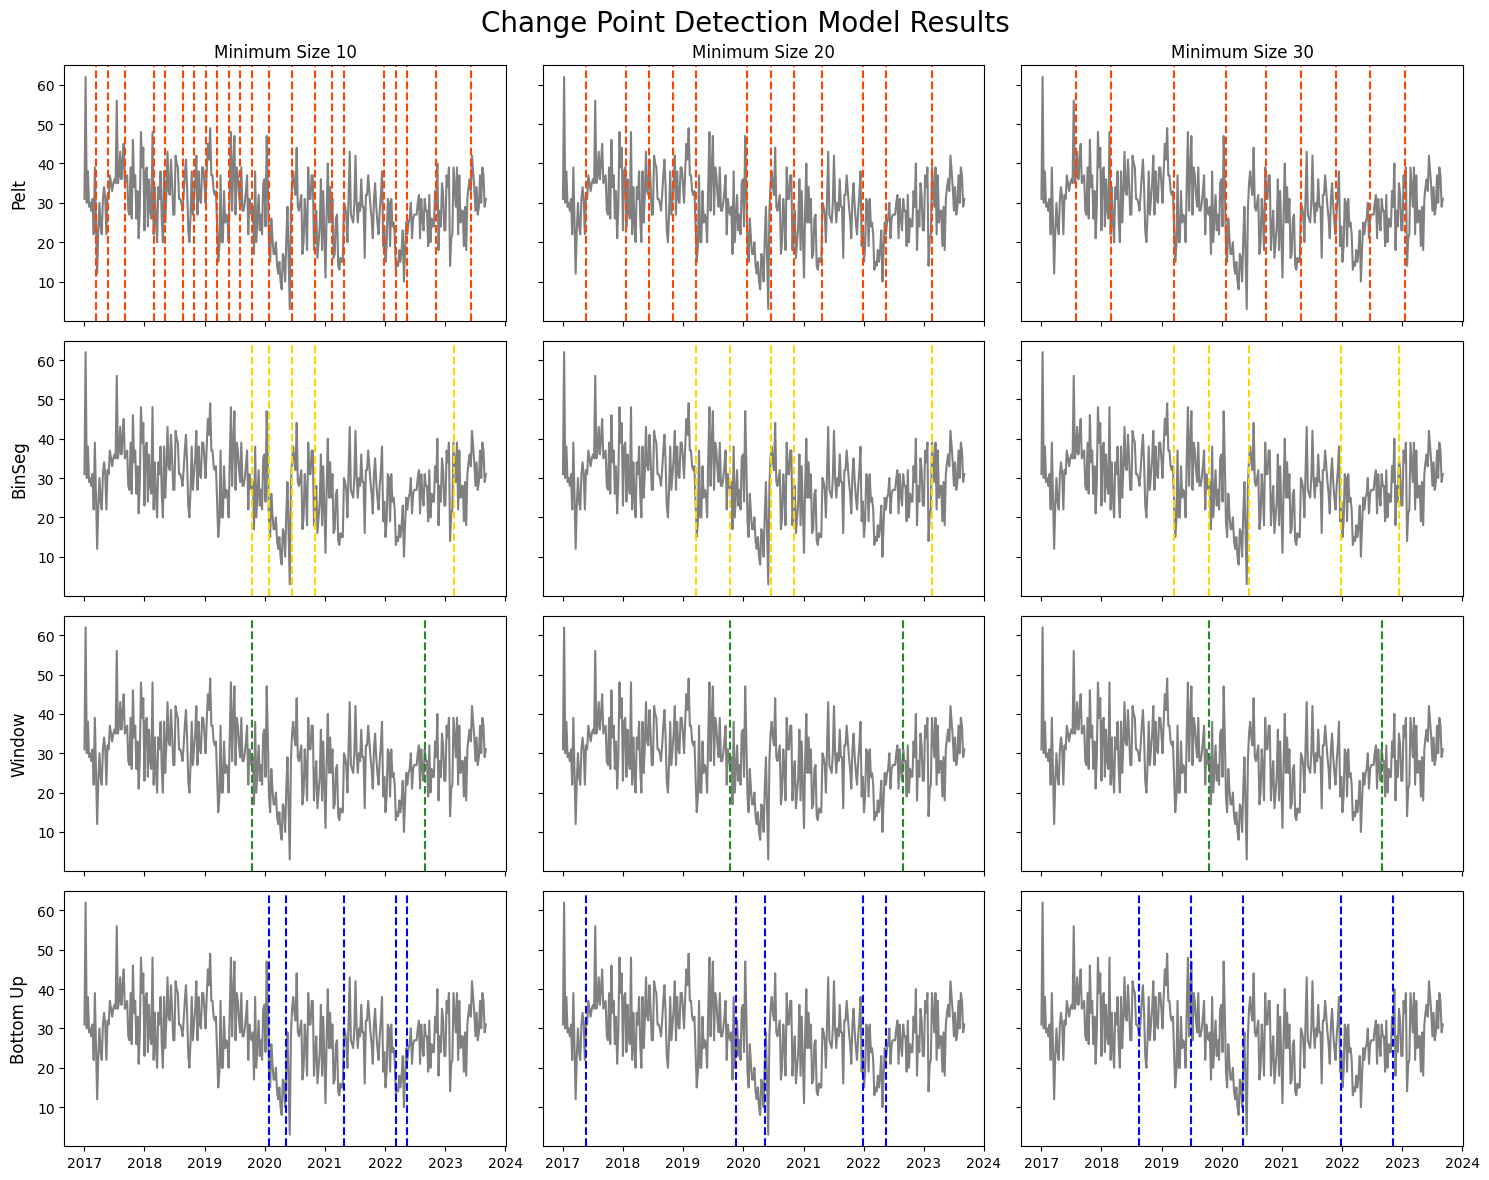

In [93]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 12), sharex=True, sharey=True)

def plot_single(result, x, y, clr='r'):
    ax = axs[x, y]
    change_points = result[:-1]
    
    ax.plot(weekly_df.index, weekly_df.values, label="Time Series", color='gray')

    for cp in change_points:
        ax.axvline(x=weekly_df.index[cp], color=clr, linestyle='--')

# Pelt
plot_single(p_10_result, 0, 0, 'orangered')
plot_single(p_20_result, 0, 1, 'orangered')
plot_single(p_30_result, 0, 2, 'orangered')

# BinSeg
plot_single(s_10_result, 1, 0, 'gold')
plot_single(s_20_result, 1, 1, 'gold')
plot_single(s_30_result, 1, 2, 'gold')

# Window
plot_single(w_10_result, 2, 0, 'forestgreen')
plot_single(w_20_result, 2, 1, 'forestgreen')
plot_single(w_30_result, 2, 2, 'forestgreen')

# Bottom Up
plot_single(b_10_result, 3, 0, 'blue')
plot_single(b_20_result, 3, 1, 'blue')
plot_single(b_30_result, 3, 2, 'blue')

# Labels
column_labels = ["Minimum Size 10", "Minimum Size 20", "Minimum Size 30"]
row_labels = ["Pelt", "BinSeg", "Window", "Bottom Up"]

# Set column labels above the subplots
for j, label in enumerate(column_labels):
    axs[0, j].set_title(label)

# Set row labels to the left of the subplots
for i, label in enumerate(row_labels):
    axs[i, 0].annotate(label, xy=(0, 0.5), xytext=(-axs[i, 0].yaxis.labelpad - 5, 0),
                    xycoords=axs[i, 0].yaxis.label, textcoords='offset points',
                    fontsize=12, ha='center', va='center', rotation='vertical')


plt.suptitle("Change Point Detection Model Results", fontsize=20)
plt.tight_layout()
plt.show()

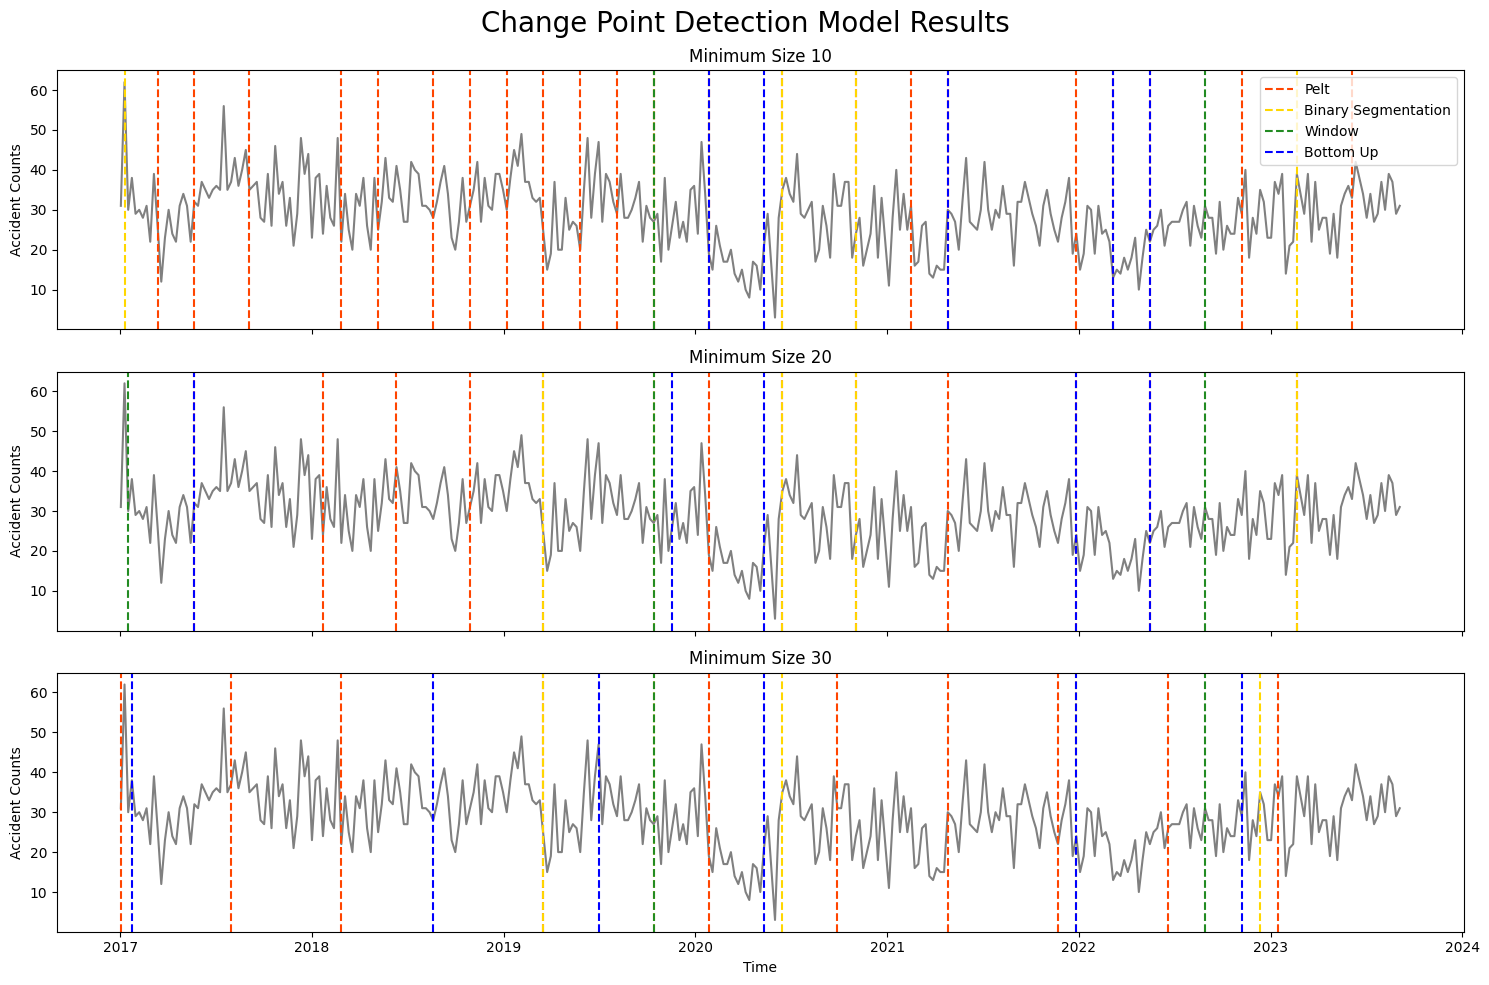

In [139]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(15, 10), sharex=True, sharey=True)

# Plot 1
ax = axs[0]
ax.plot(weekly_df.index, weekly_df.values, color='gray')

change_points = p_10_result[:-1]
for cp in change_points:
    ax.axvline(x=weekly_df.index[cp], color='orangered', linestyle='--')

change_points = s_10_result[:-1]
for cp in change_points:
    ax.axvline(x=weekly_df.index[cp], color='gold', linestyle='--')

change_points = w_10_result[:-1]
for cp in change_points:
    ax.axvline(x=weekly_df.index[cp], color='forestgreen', linestyle='--')

change_points = b_10_result[:-1]
for cp in change_points:
    ax.axvline(x=weekly_df.index[cp], color='blue', linestyle='--')

# Plot 2
ax = axs[1]
ax.plot(weekly_df.index, weekly_df.values, color='gray')

change_points = p_20_result[:-1]
for cp in change_points:
    ax.axvline(x=weekly_df.index[cp], color='orangered', linestyle='--')

change_points = s_20_result[:-1]
for cp in change_points:
    ax.axvline(x=weekly_df.index[cp], color='gold', linestyle='--')

change_points = w_20_result[:-1]
for cp in change_points:
    ax.axvline(x=weekly_df.index[cp], color='forestgreen', linestyle='--')

change_points = b_20_result[:-1]
for cp in change_points:
    ax.axvline(x=weekly_df.index[cp], color='blue', linestyle='--')
    
# Plot 3
ax = axs[2]
ax.plot(weekly_df.index, weekly_df.values, color='gray')

change_points = p_30_result[:-1]
for cp in change_points:
    ax.axvline(x=weekly_df.index[cp], color='orangered', linestyle='--', label='Pelt')

change_points = s_30_result[:-1]
for cp in change_points:
    ax.axvline(x=weekly_df.index[cp], color='gold', linestyle='--', label='Binary Segmentation')

change_points = w_30_result[:-1]
for cp in change_points:
    ax.axvline(x=weekly_df.index[cp], color='forestgreen', linestyle='--', label='Window')

change_points = b_30_result[:-1]
for cp in change_points:
    ax.axvline(x=weekly_df.index[cp], color='blue', linestyle='--', label='Bottom Up')

# Labels
column_labels = ["Minimum Size 10", "Minimum Size 20", "Minimum Size 30"]

# Set column labels above the subplots
for j, label in enumerate(column_labels):
    axs[j].set_title(label)
    
for ax in axs:
    ax.set_ylabel("Accident Counts")

axs[0].legend([
    axs[0 // 10 - 1].axvline(x=weekly_df.index[0], color='orangered', linestyle='--'),
    axs[10 // 10 - 1].axvline(x=weekly_df.index[1], color='gold', linestyle='--'),
    axs[20 // 10 - 1].axvline(x=weekly_df.index[2], color='forestgreen', linestyle='--'),
    axs[30 // 10 - 1].axvline(x=weekly_df.index[3], color='blue', linestyle='--')
], ['Pelt', 'Binary Segmentation', 'Window', 'Bottom Up'])

ax.set_xlabel("Time")

plt.suptitle("Change Point Detection Model Results", fontsize=20)
plt.tight_layout()
plt.show()

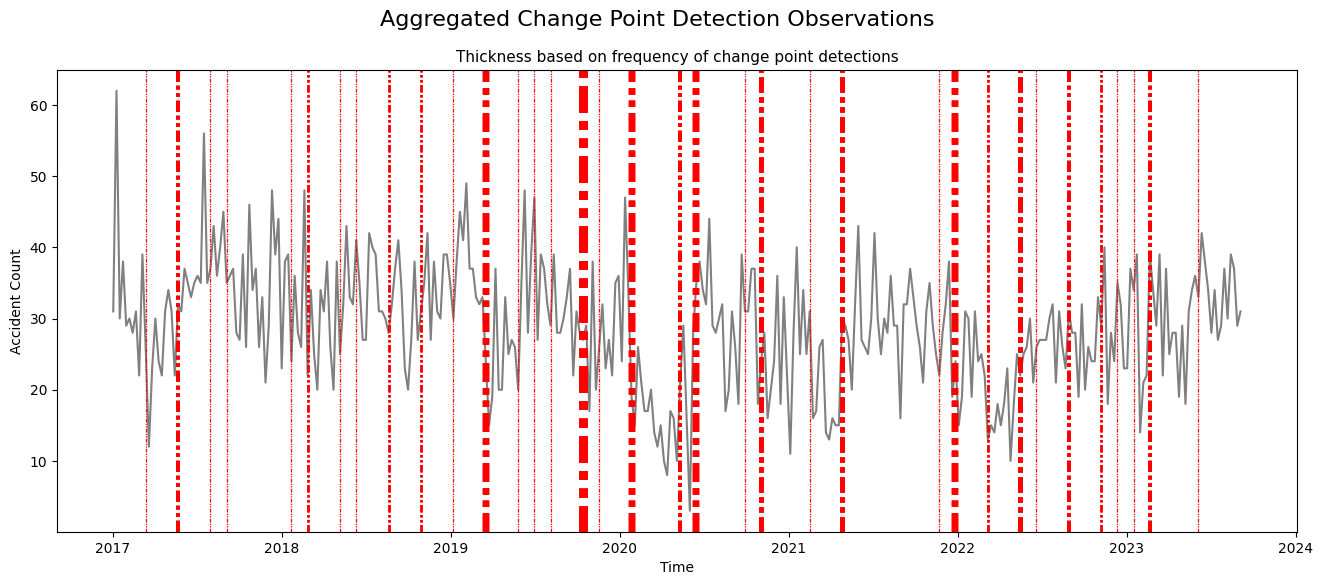

In [137]:
# Filtering by Date
all_results_filtered = [val for val in all_results if val != 349]

# Getting Line Counts
raw_counts = dict(pd.DataFrame((all_results_filtered)).value_counts())

cleaned_counts = {}

for key in raw_counts:
    cleaned_counts[key[0]] = raw_counts[key]
    
# Plotting
fig, ax = plt.subplots(figsize=(16, 6), sharex=True, sharey=True)

ax.plot(weekly_df.index, weekly_df.values, color='gray')

for cp in all_results_filtered:
    ax.axvline(x=weekly_df.index[cp], color='red', linestyle=(0, (3, 1, 1, 1, 1, 1)), linewidth=cleaned_counts[cp]*0.9)

ax.set_ylabel("Accident Count")
ax.set_xlabel("Time")

plt.suptitle("Aggregated Change Point Detection Observations", fontsize=16)
plt.title("Thickness based on frequency of change point detections", fontsize=11)
plt.show()
